In [139]:
import math
import numpy as np
import matplotlib.pyplot as plt

def _tiny():
    return np.finfo('float64').eps

def calculate_d3r(rt, last_vt, last_ddt):
    x = (rt - 0.5*last_vt) / (last_ddt + _tiny())
    y = ((last_ddt**2)*(rt - 0.5*last_vt) - 0.5*last_vt*(rt**2)) / (last_ddt**3 + _tiny())
    return (x,y)
def calculate_dsr(rt, last_vt, last_wt):
    delta_vt = rt - last_vt
    delta_wt = rt**2 - last_wt
    return (last_wt * delta_vt - 0.5 * last_vt * delta_wt) / ((last_wt - last_vt**2)**(3/2) )

# def calculate_d3r(rt, last_vt, last_ddt):
#     x = (rt - 0.5*last_vt) / (last_ddt + _tiny())
#     y = ((last_ddt**2)*(rt - 0.5*last_vt) - 0.5*last_vt*(rt**2)) / (last_ddt**3 + _tiny())
#     return (x,y)
class RiskAdjusteMetric:
    def __init__(self, last_vt,last_wt, last_ddt, last_dt2,decay_rate):
      self.last_vt = last_vt
      self.last_wt = last_wt
      self.decay_rate=decay_rate
      self.last_ddt = last_ddt
      self.last_dt2 = last_dt2
      self.last_sr = 0
      self.last_ddr = 0
      
      
    def _tiny():
        return np.finfo('float64').eps



    def update_metrics(self, rt):
        # rt = np.log(1+rt)
        dsr = calculate_dsr(rt, self.last_vt, self.last_wt)
        # d3r_cond1, d3r_cond2 = calculate_d3r(rt, self.last_vt, self.last_ddt)
        # d3r = d3r_cond1 if rt > 0 else d3r_cond2

        self.last_vt += self.decay_rate * (rt - self.last_vt)
        self.last_wt += self.decay_rate * (rt**2 - self.last_wt)

        # self.last_dt2 += self.decay_rate * (np.minimum(rt, 0)**2 - self.last_dt2)
        # self.last_ddt = math.sqrt(self.last_dt2)
        self.last_sr += self.decay_rate * dsr
        # self.last_ddr += self.decay_rate * d3r
        return dsr


In [3]:
from pandas import read_csv


df_dow =read_csv('./data/dow.csv')
df =df_dow.copy()
df = df_dow[df_dow.tic.isin( ['AAPL'])]

In [4]:
returns = df['close'].pct_change()

In [161]:
import numpy as np

def calculate_dsr(rt, last_vt, last_wt):
    delta_vt = rt - last_vt
    delta_wt = rt**2 - last_wt
    return (last_wt * delta_vt - (0.5 * last_vt * delta_wt)) / ((last_wt - last_vt**2)**(3/2) + np.finfo('float64').eps)
class RiskAdjusteMetric:
    def __init__(self,decay_rate):
      self.last_vt = 0
      self.last_wt = 0
      self.step = 0
      self.decay_rate=decay_rate
      self.last_sr = 0      
    

    def update_metrics(self, rt):
        self.step+=1
        if self.step>20:
          dsr = calculate_dsr(rt, self.last_vt, self.last_wt)
        else:
          dsr =0
        self.last_vt += self.decay_rate * (rt - self.last_vt)
        self.last_wt += self.decay_rate * (rt**2 - self.last_wt)
        self.last_sr += self.decay_rate * dsr
        return dsr


In [154]:
returns = np.random.normal(0,0.05,10000)

In [166]:
estimator = RiskAdjusteMetric(0.0001)
dsrs = []
for i,item in enumerate(returns):
 dsrs.append(estimator.update_metrics(item))


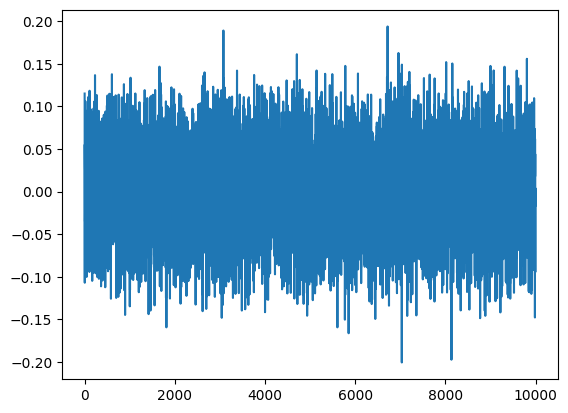

In [159]:
import pandas as pd


plt.plot(returns)
plt.show()

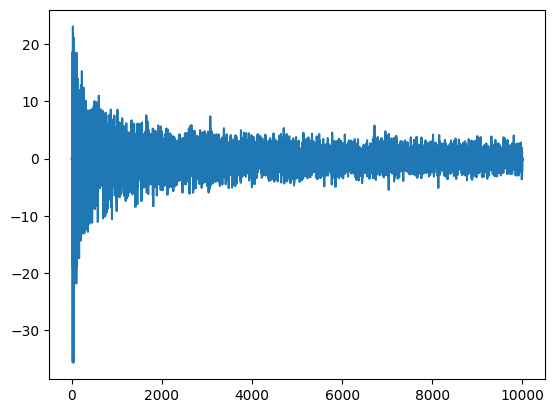

In [167]:
import pandas as pd


plt.plot(pd.Series(dsrs))
plt.show()

In [168]:
pd.Series(returns).pct_change()[1:].mean()/pd.Series(returns).pct_change()[1:].std()

-0.006339811691576916

In [169]:
estimator.last_sr

-0.024854970249558083

In [123]:
df['close'].pct_change()[1:].mean()/df['close'].pct_change()[1:].std()


0.042591706397122536

In [2]:
import numpy as np

# 2D array with shape (3, 2)
b = np.array([[4, 5],
              [7, 8],
              [10, 11]])

# 1D array with 3 elements
a = np.array([1, 2, 3])

# Reshape a to a column vector (shape becomes (3, 1))
a_col = a[:, np.newaxis]

# Concatenate along columns (axis=1)
result = np.concatenate((a_col,b), axis=1)

print(result)


[[ 1  4  5]
 [ 2  7  8]
 [ 3 10 11]]


In [ ]:
import numpy as np

tensor_3d = np.random.rand(1, 4, 3)  # Example 3D tensor of shape (5,4,3)
print(tensor_3d)
first_layer = tensor_3d[0, :, -1]      # Extract first layer as 2D (4,3)
first_layer = first_layer[:,np.newaxis]
first_layer

[[[0.58829177 0.07671598 0.98299035]
  [0.11018302 0.7689991  0.82814679]
  [0.02824905 0.25478077 0.00996102]
  [0.31344381 0.3061169  0.55196961]]]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [1]:
import torch

# Example 2D tensor with shape (batch_size=2, 3, 4)
tensor_2d = torch.tensor([
    [[1, 2, 3, 4], 
     [5, 6, 7, 8], 
     [9, 10, 11, 12]],
    
    [[13, 14, 15, 16], 
     [17, 18, 19, 20], 
     [21, 22, 23, 24]]
])

print("Original shape:", tensor_2d.shape)
flattened = torch.flatten(tensor_2d, start_dim=1)
print("Flattened shape:", flattened.shape)
print(flattened)


Original shape: torch.Size([2, 3, 4])
Flattened shape: torch.Size([2, 12])
tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])


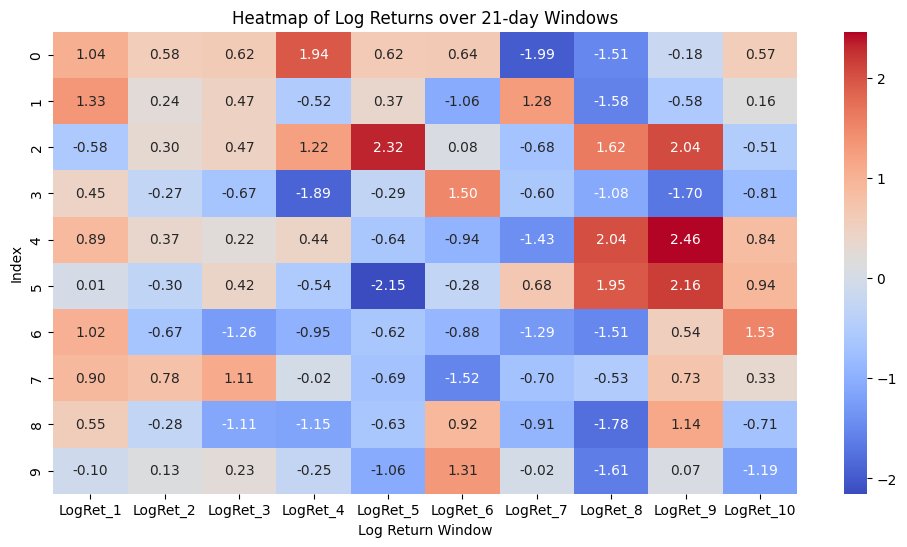

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define m
m = 10  # Change this to any value you need

# Create the matrix
weights = np.arange(1, m + 1)
volatility = np.arange(1, m + 1)
log_returns = np.random.randn(m, m)  # Simulated log returns

# Combine into a DataFrame
columns = ['Weights', 'Volatility'] + [f'LogRet_{i+1}' for i in range(m)]
data = np.column_stack((weights, volatility, log_returns))
df = pd.DataFrame(data, columns=columns)

# Heatmap of Log Returns
plt.figure(figsize=(12, 6))
sns.heatmap(df.iloc[:, 2:], cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap of Log Returns over 21-day Windows")
plt.xlabel("Log Return Window")
plt.ylabel("Index")
plt.show()


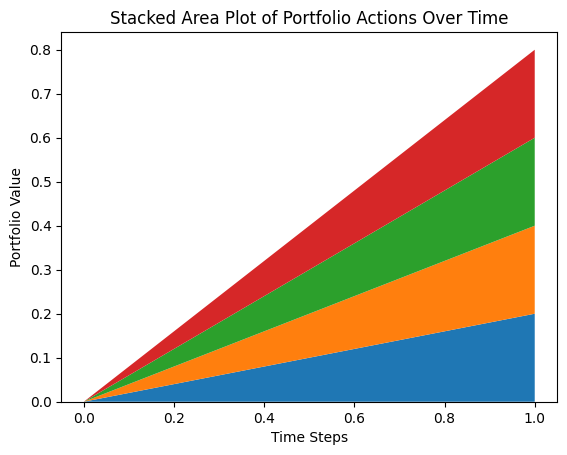

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (simulate 2 time steps, portfolio_size 4)
portfolio_size = 4  # Set your portfolio size
num_steps = 2  # Number of time steps
actions_memory = [
    [0, 0, 0, 0],  # Portfolio values at time step 1
    [0.2, 0.2, 0.2, 0.2]  # Portfolio values at time step 2
]

# Transpose the list of lists so that each list corresponds to an action over time
actions_memory = np.array(actions_memory).T  # Transpose the data to have each row as a separate stack

# Now you can plot it as a stacked area plot
plt.stackplot(range(num_steps), *actions_memory)
plt.xlabel('Time Steps')
plt.ylabel('Portfolio Value')
plt.title('Stacked Area Plot of Portfolio Actions Over Time')
plt.show()
